## 1. Data Preprocessing

In [1]:
from calendar import month_abbr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Mapping the target column to numerical data
mapping_yn = {'no': 0, 'yes': 1}
df['y'] = df['y'].map(mapping_yn)

### Exploratory Data Analysis

#### Age
- Only few records have an age > 60.
- For records with age < 60, the younger client are more likely to subscribe.

<AxesSubplot:>

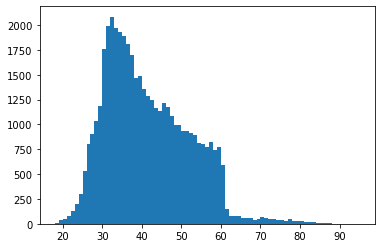

In [5]:
df['age'].hist(bins=len(df['age'].unique()), grid=False)

<AxesSubplot:xlabel='age'>

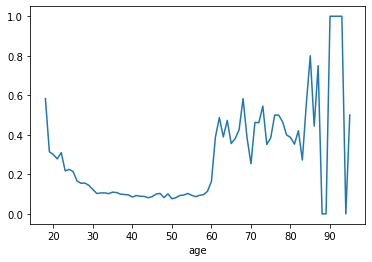

In [6]:
df.groupby('age').mean()['y'].plot()

#### Job
- The retired client and student are more likely to subscribe, while the blue-collars are less.

<AxesSubplot:>

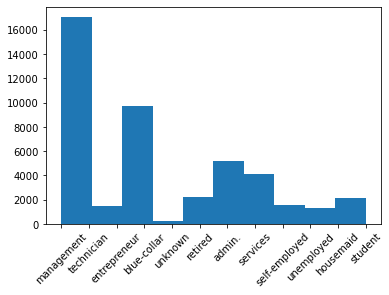

In [7]:
df['job'].hist(grid=False, xrot=45)

<AxesSubplot:xlabel='job'>

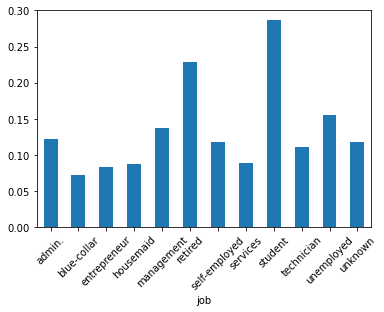

In [8]:
df.groupby('job').mean()['y'].plot.bar(rot=45)

#### Marital
- Single clients are a little bit more likely to subscribe.

<AxesSubplot:>

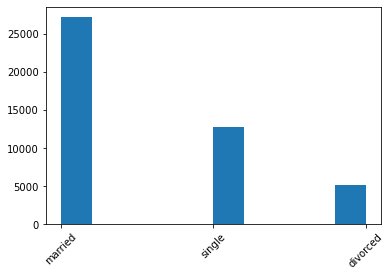

In [9]:
df['marital'].hist(grid=False, xrot=45)

<AxesSubplot:xlabel='marital'>

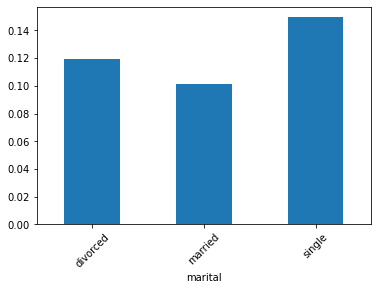

In [10]:
df.groupby('marital').mean()['y'].plot.bar(rot=45)

#### Education
- The clients with higher education level are more likely to subscribe.

<AxesSubplot:>

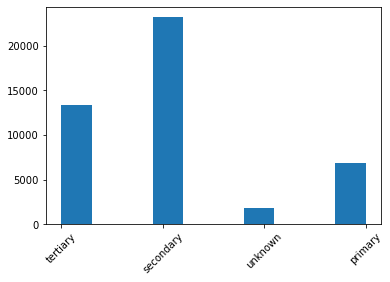

In [11]:
df['education'].hist(grid=False, xrot=45)

<AxesSubplot:xlabel='education'>

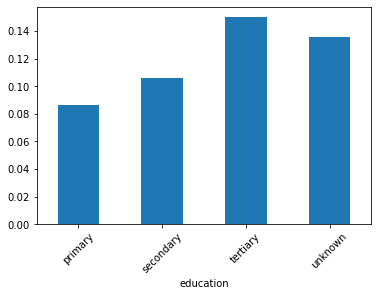

In [12]:
df.groupby('education').mean()['y'].plot.bar(rot=45)

#### Default
- Client without credit in default are more likely to subscribe.

<AxesSubplot:>

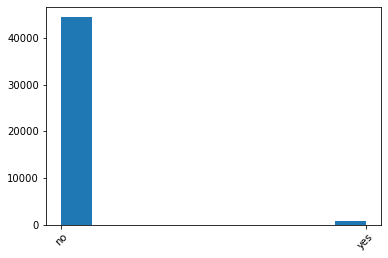

In [13]:
df['default'].hist(grid=False, xrot=45)

<AxesSubplot:xlabel='default'>

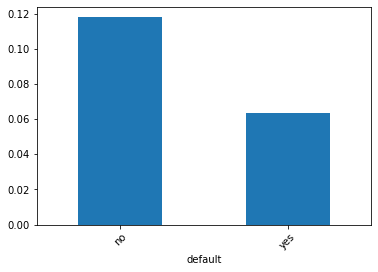

In [14]:
df.groupby('default').mean()['y'].plot.bar(rot=45)

#### Balance
- Clients with negative balance seems to be less likely to subscribe.

In [15]:
df_balance_ranged = df[(df['balance'] < 2000) & (df['balance'] > -500)]

<AxesSubplot:>

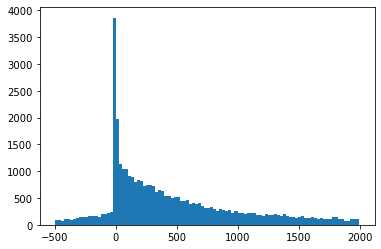

In [16]:
df_balance_ranged['balance'].hist(bins=100, grid=False)

<AxesSubplot:xlabel='balance'>

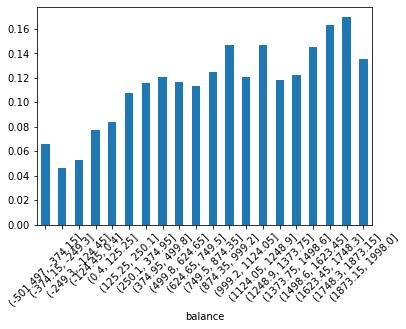

In [17]:
df_balance_ranged.groupby(pd.cut(df_balance_ranged['balance'], bins=20)).mean()['y'].plot.bar(rot=45)

#### Housing
- Clients with housing loan are less likely to subscribe.

<AxesSubplot:xlabel='housing'>

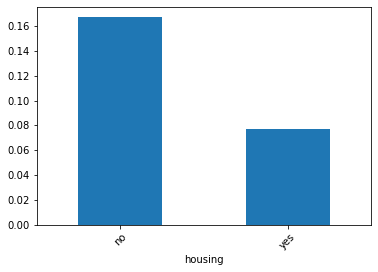

In [18]:
df.groupby('housing').mean()['y'].plot.bar(rot=45)

#### Loan
- Clients with personal loan are less likely to subscribe.

<AxesSubplot:xlabel='loan'>

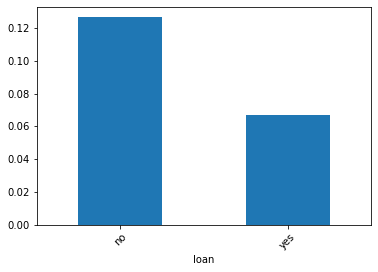

In [19]:
df.groupby('loan').mean()['y'].plot.bar(rot=45)

#### Contact
- The cellular and telephone contact have similar probability to subscribe, but the unknown has a significantly lower probability than the others.

<AxesSubplot:>

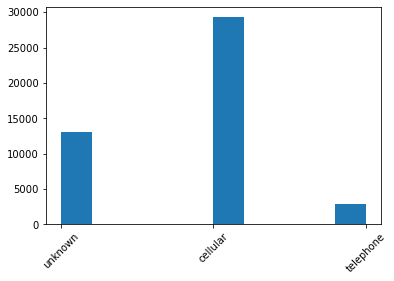

In [20]:
df['contact'].hist(grid=False, xrot=45)

<AxesSubplot:xlabel='contact'>

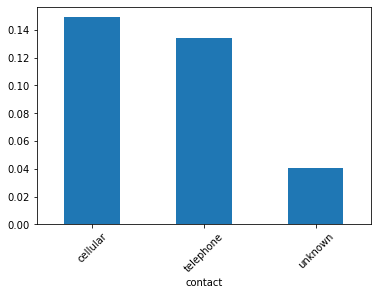

In [21]:
df.groupby('contact').mean()['y'].plot.bar(rot=45)

#### Day

<AxesSubplot:>

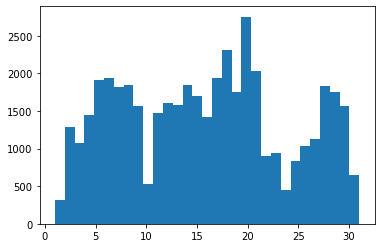

In [22]:
df['day'].hist(bins=len(df['day'].unique()), grid=False)

<AxesSubplot:xlabel='day'>

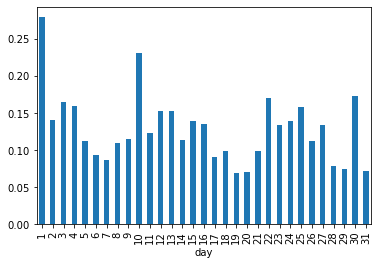

In [23]:
df.groupby('day').mean()['y'].plot.bar()

#### Month

<AxesSubplot:>

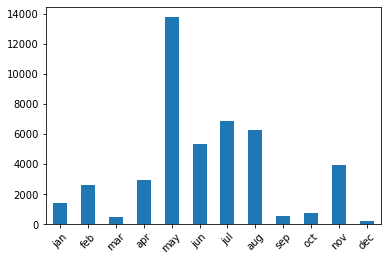

In [24]:
df['month'].value_counts().loc[list(map(lambda x: x.lower(), month_abbr))[1:]].plot.bar(rot=45)

<AxesSubplot:xlabel='month'>

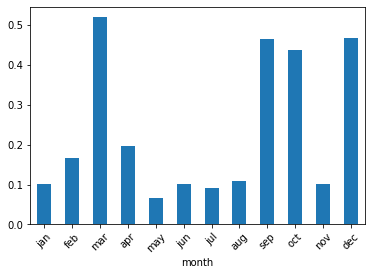

In [25]:
df.groupby('month').mean().loc[list(map(lambda x: x.lower(), month_abbr))[1:], 'y'].plot.bar(rot=45)

#### Duration
- Client with longer contact duration are more likely to subscribe

<AxesSubplot:>

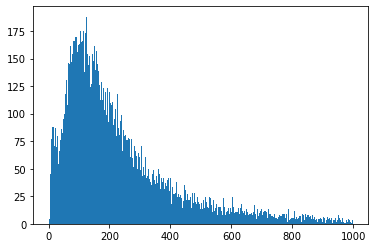

In [26]:
df.loc[df['duration'] < 1000, 'duration'].hist(bins=1000, grid=False)

<AxesSubplot:xlabel='duration'>

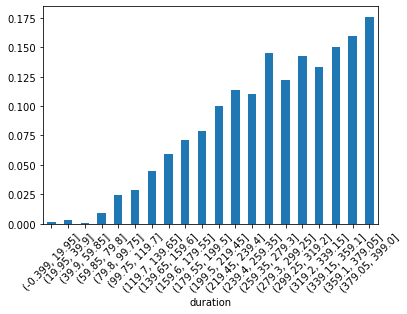

In [27]:
df_duration_ranged = df[df['duration'] < 400]
df_duration_ranged.groupby(pd.cut(df_duration_ranged['duration'], bins=20)).mean()['y'].plot.bar(rot=45)

#### Campaign
- Most clients have only one contact.
- Clients with more contacts are less likely to subscribe.

<AxesSubplot:>

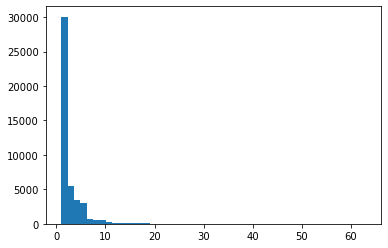

In [28]:
df['campaign'].hist(bins=len(df['campaign'].unique()), grid=False)

<AxesSubplot:xlabel='campaign'>

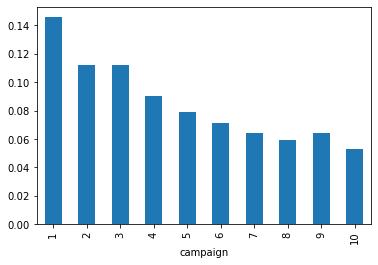

In [29]:
df[df['campaign'] <= 10].groupby('campaign').mean()['y'].plot.bar()

#### Pdays
- The majority of users did not have a last campaign

<AxesSubplot:>

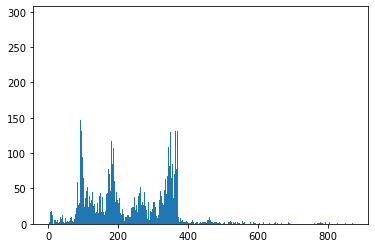

In [30]:
df.loc[df['pdays'] > -1, 'pdays'].hist(bins=len(df['pdays'].unique()) - 1, grid=False)

#### Previous
- For the previous <= 10, clients with more previous campaigns are more likely to subscribe.
- There are only few clients have previous campaigns > 10.

<AxesSubplot:>

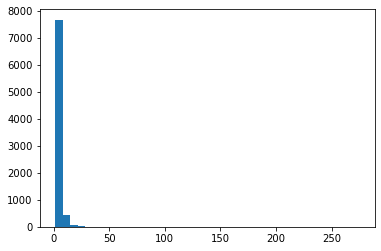

In [31]:
df.loc[df['previous'] > 0, 'previous'].hist(bins=len(df['previous'].unique()) - 1, grid=False)

<AxesSubplot:xlabel='previous'>

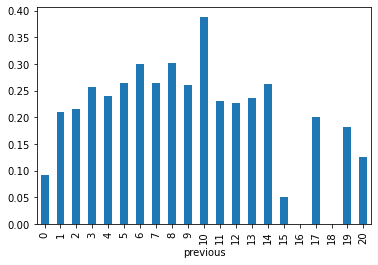

In [32]:
df[df['previous'] <= 20].groupby('previous').mean()['y'].plot.bar()

#### Poutcome
- Clients with successful previous campaigns are more likely to subscribe.

<AxesSubplot:>

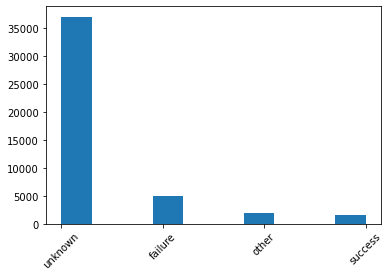

In [33]:
df['poutcome'].hist(grid=False, xrot=45)

<AxesSubplot:xlabel='poutcome'>

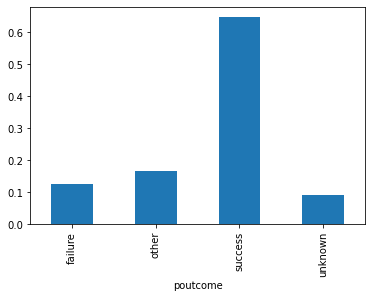

In [34]:
df.groupby('poutcome').mean()['y'].plot.bar()

### Data Cleaning

#### Mapping the "yes", "no" to numerical type

In [35]:
col_yn = ['default', 'housing', 'loan']

In [36]:
for col in col_yn:
    df[col] = df[col].map(mapping_yn)

#### The proportion of "unknown" value in each column

In [37]:
col_contains_unknown = ['job', 'education', 'contact', 'poutcome']

In [38]:
for col in col_contains_unknown:
    print('{}: {:.2f}'.format(col, df.loc[df[col] == 'unknown', col].count()/df[col].count()))

job: 0.01
education: 0.04
contact: 0.29
poutcome: 0.82


#### Mapping the ordinal education data to numerical
But how to deal with "unknown"?

In [39]:
mapping_education = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}

In [40]:
df['education'] = df['education'].map(mapping_education)

In [41]:
df['education'].value_counts(dropna=False)

2    23202
3    13301
1     6851
0     1857
Name: education, dtype: int64

#### Mapping the "month" to number format

In [42]:
mapping_month = dict((month.lower(), number) for number, month in enumerate(month_abbr))

In [43]:
df['month'] = df['month'].map(mapping_month)

#### One-hot encoding the other nominal columns
Drop the "unknown" values by encoding the data point to all-zero in one-hot

In [44]:
cols_onehot = ['job', 'marital', 'contact', 'poutcome']

In [45]:
df = pd.get_dummies(df, columns=cols_onehot)

In [46]:
cols_onehot_unknown = [col for col in df.columns if 'unknown' in col]

In [47]:
cols_onehot_unknown

['job_unknown', 'contact_unknown', 'poutcome_unknown']

In [48]:
df = df.drop(cols_onehot_unknown, axis=1)

In [49]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [50]:
df.iloc[:,:10]

,age,education,default,balance,housing,loan,day,month,duration,campaign
0,58,3,0,2143,1,0,5,5,261,1
1,44,2,0,29,1,0,5,5,151,1
2,33,2,0,2,1,1,5,5,76,1
3,47,0,0,1506,1,0,5,5,92,1
4,33,0,0,1,0,0,5,5,198,1
...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3
45207,71,1,0,1729,0,0,17,11,456,2
45208,72,2,0,5715,0,0,17,11,1127,5
45209,57,2,0,668,0,0,17,11,508,4


In [51]:
df.iloc[:,10:20]

,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed
0,-1,0,0,0,0,0,0,1,0,0
1,-1,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,1,0,0,0,0
3,-1,0,0,0,1,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,-1,0,1,0,0,0,0,0,0,0
45207,-1,0,1,0,0,0,0,0,1,0
45208,184,3,1,0,0,0,0,0,1,0
45209,-1,0,0,0,1,0,0,0,0,0


In [52]:
df.iloc[:,20:]

,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,1,0,0,1,0,1,0,0,0,0
45207,0,0,0,0,1,0,0,1,0,0,0,0
45208,0,0,0,0,0,1,0,1,0,0,0,1
45209,0,0,0,0,0,1,0,0,1,0,0,0
